# Predicting School Failure in the UK with scikit-learn
Data taken from [Ofsted](https://reports.ofsted.gov.uk/)

In [28]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [29]:
import os
import re
# Get all most recent closed files
patterns = ["progress","teaching","work","well","The","provision","this","This","Children","enqiures uk", "the", "learning", "staff", "good", "ir", "inspection", "the", "schools", "children", "pupils", "school", "pupil", "Ofsted", "Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.ofsted.gov.uk", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
closed_school_names = []
closed = []
closed_root = '../schools/closed/'
for path, subdirs, files in os.walk(closed_root):
    for s in subdirs:
        f = os.path.join(path,s)
        reports = ""
        for p2, s2, f2 in os.walk(f):
            for file in f2:
                if file == '':
                    continue
                txt = open(os.path.join(p2,str(file)),"r", encoding = "ISO-8859-1")
                content = txt.read()
                if re.search("childminder",content,re.IGNORECASE):
                    continue
                for pattern in patterns:
                    content = content.replace(pattern,'')
                content = content.replace('\n',' ')
                reports += content
        if reports != "":
            closed.append(reports)
            closed_school_names.append(s)

In [30]:
# Get all most recent open files
patterns = ["progress","teaching","work","well","The","provision","this","This","Children","enqiures uk", "the", "learning", "staff", "good", "ir", "inspection", "the", "schools", "children", "pupils", "school", "pupil", "Ofsted", "Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.ofsted.gov.uk", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
opened = []
open_school_names = []
open_root = '../schools/open/'
for path, subdirs, files in os.walk(open_root):
    for s in subdirs:
        f = os.path.join(path,s)
        reports = ""
        for p2, s2, f2 in os.walk(f):
            for file in f2:
                if file == '':
                    continue
                txt = open(os.path.join(p2,str(file)),"r",  encoding = "ISO-8859-1")
                content = txt.read()
                if re.search("childminder",content,re.aIGNORECASE):
                    continue
                for pattern in patterns:
                    content = content.replace(pattern,'')
                content = content.replace('\n',' ')
                reports += content
        if reports != "":
            opened.append(reports)
            open_school_names.append(s)

In [31]:
import pandas as pd
df_closed = pd.DataFrame()
closed_labels = ["closed" for school in closed]
df_closed["school"] = closed_school_names
df_closed["text"] = closed
df_closed["label"] = closed_labels

In [32]:
df_closed.head()

school  \
0                      Tweeddale Primary School   
1    Loganberries Childcare And Tutoring Closed   
2  Dovedale Before and After School Club Closed   
3                                Pepe & Friends   
4      Cottonstones Pre-School Playgroup Closed   

                                                text   label  
0                                      Existing a...  closed  
1                                                ...  closed  
2                                                ...  closed  
3                                  Pepe & Friends...  closed  
4                                             Unt...  closed

In [33]:
# Filter out schools that were marked as closed due to academy conversion
import numpy as np
df_closed = df_closed.replace(np.nan, '', regex=True)
df_closed = df_closed[~df_closed.text.apply(lambda x: bool(re.search("academy converters",x,re.IGNORECASE)))]

In [34]:
df_open = pd.DataFrame()
open_labels = ["open" for school in opened]
df_open["school"] = open_school_names
df_open["text"] = opened
df_open["label"] = open_labels

In [35]:
df_open.head()

school  \
0                           Tweeddale Primary School   
1  Redcliffe Childrens Centre and Maintained Nurs...   
2                                       Magpies West   
3  St John's Church of England Primary School, La...   
4                         Stoneydelph Primary School   

                                                text label  
0                                      Existing a...  open  
1                                                ...  open  
2                                                ...  open  
3                                      Existing a...  open  
4                                  Existing acade...  open

In [36]:
df = df_closed.append(df_open, ignore_index=True)
df.label.unique()

array(['closed', 'open'], dtype=object)

In [37]:
df.head()

school  \
0         Loganberries Childcare And Tutoring Closed   
1       Dovedale Before and After School Club Closed   
2                                     Pepe & Friends   
3           Cottonstones Pre-School Playgroup Closed   
4  St Mary and St John Junior and Infant School C...   

                                                text   label  
0                                                ...  closed  
1                                                ...  closed  
2                                  Pepe & Friends...  closed  
3                                             Unt...  closed  
4                                            Scho...  closed

In [38]:
print ("Total number of closed schools: {}".format(len(closed)))
print ("Total number of open schools: {}".format(len(opened)))

Total number of closed schools: 23846
Total number of open schools: 48205


In [39]:
print ("Closed schools after filtering for academy converters: {}".format(len(df_closed))) # 530 after filtering out academy converter
print ("Open schools: {}".format(len(df_open)))

Closed schools after filtering for academy converters: 21596
Open schools: 48205


In [40]:
# from wordcloud import WordCloud
# import PIL
# import itertools
# import matplotlib.pyplot as plt

# targets = ['text']

# l1 = df_closed['text'].values.tolist()
# l2 = df_open['text'].values.tolist()
# school_categories = [l1, l2]

# for schools,target in zip(school_categories, targets):
#   raw_str = df[target].str.cat(sep=',')
#   wordcloud = WordCloud( max_words=1000,margin=0).generate(raw_str)
#   plt.figure()
#   plt.imshow(wordcloud, interpolation="bilinear")
#   plt.axis("off")
#   plt.show()

# for o_schools,target in zip(l2, targets):
#   raw_str = df_open[target].str.cat(sep=',')
#   wordcloud = WordCloud(max_words=1000,margin=0).generate(raw_str)
#   plt.figure()
#   plt.imshow(wordcloud, interpolation="bilinear")
#   plt.axis("off")
#   plt.show()

# for c_schools,target in zip(l1, targets):
#   raw_str = df_closed[target].str.cat(sep=',')
#   wordcloud = WordCloud(max_words=1000,margin=0).generate(raw_str)
#   plt.figure()
#   plt.imshow(wordcloud, interpolation="bilinear")
#   plt.axis("off")
#   plt.show()

In [41]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ") # Clean up non-alphabetical symbols
import numpy as np
df = df.replace(np.nan, '', regex=True)

In [42]:
# Clean up stopwords
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vcabales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df.head()

school  \
0         Loganberries Childcare And Tutoring Closed   
1       Dovedale Before and After School Club Closed   
2                                     Pepe & Friends   
3           Cottonstones Pre-School Playgroup Closed   
4  St Mary and St John Junior and Infant School C...   

                                                text   label  
0  Loganberries Childcare And Tutoring Holy Spit ...  closed  
1  Dovedale Before After School Club Dovedale Pri...  closed  
2  Pepe Friends Skylines Village Limeharbour LOND...  closed  
3  Untitled Cottonstones Pre School Playgroup Uni...  closed  
4  School report St Mary St John Junior Infant Sc...  closed

In [44]:
from sklearn.model_selection import train_test_split # Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.33, random_state=42) 

In [45]:
X_train.shape

(46766,)

In [46]:
X_test.shape

(23035,)

In [47]:
y_train.shape

(46766,)

In [48]:
# Tokenize the words - CountVectorizer filters out stopwords
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=10000,ngram_range=(1,2))
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(46766, 10000)

In [49]:
# Transform testing data with CountVectorizer, use later to check for overfitting / underfitting
test_features = count_vect.transform(X_test)

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
X_train_tfidf = TfidfTransformer(smooth_idf=True,use_idf=True)
X_train_tfidf.fit(X_train_counts)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [51]:
# print idf values
df_idf = pd.DataFrame(X_train_tfidf.idf_, index=count_vect.get_feature_names(),columns=["tf_idf_weights"])
df_idf.sort_values(by=['tf_idf_weights'])
# the lower the idf value, the less unique the word is (meaning that the word appears more frequently)

tf_idf_weights
website                      1.026148
years                        1.027290
inspection                   1.035387
number                       1.038293
may                          1.042345
information                  1.042657
available                    1.044958
it                           1.046660
report                       1.046704
date                         1.047287
education                    1.048431
inspector                    1.049936
team                         1.052457
act                          1.055842
time                         1.060284
telephone                    1.061648
reference                    1.067075
parents                      1.073544
following                    1.074373
ensure                       1.074857
would                        1.076540
se                           1.076817
quality                      1.078042
support                      1.079245
reference number             1.079777
including                    1.080542
needs                        1.080588
made                         1.080750
skills                       1.080866
set                          1.080959
...                               ...
fostering agency             5.820688
all saints                   5.828677
independent fostering        5.834039
grammar school               5.875197
fostering services           5.923987
park primary                 5.950815
house school                 5.962973
supervising social           5.962973
care leavers                 5.969108
st james                     5.972190
average score                5.978382
fs                           6.035905
lower school                 6.143461
st andrew                    6.147131
nms boarders                 6.158222
hill primary                 6.199974
park school                  6.239504
st michael                   6.243545
st joseph                    6.255765
retention pass               6.289101
our lady                     6.327983
nms fostering                6.444665
starts retention             6.464666
adoption service             6.521824
no starts                    6.521824
hall school                  6.559976
adopters                     6.628969
jrs                          7.127960
service page                 7.209638
council fostering            7.242074

[10000 rows x 1 columns]

In [52]:
import pickle
pickle.dump(count_vect, open('../models/count_vect.pkl','wb'))

In [27]:
X_train_dtm = count_vect.transform(X_train)

In [28]:
# Use dummy classifier to get a baseline
from sklearn.dummy import DummyClassifier 
baseline = DummyClassifier().fit(X_train_dtm, y_train)

In [29]:
y_pred_class_baseline = baseline.predict(test_features)

In [30]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class_baseline) # Record baseline accuracy

0.5715215975689169

In [87]:
metrics.confusion_matrix(y_test, y_pred_class_baseline)

array([[ 2159,  4904],
       [ 4989, 10983]])

In [88]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['closed','open']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 2159  4904]
 [ 4989 10983]]
Normalized confusion matrix
[[0.31 0.69]
 [0.31 0.69]]


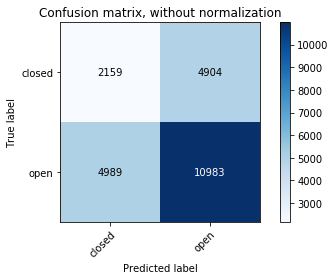

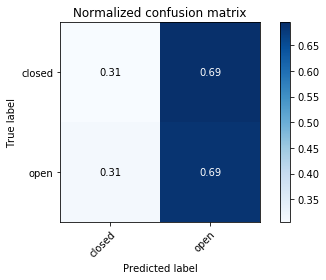

In [89]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_baseline, classes=['closed','open'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_baseline, classes=['closed','open'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [90]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB().fit(X_train_dtm, y_train)

In [91]:
# Make predictions with testing features from X_test
y_pred_class_multi_nb = multi_nb.predict(test_features)

In [92]:
metrics.accuracy_score(y_test, y_pred_class_multi_nb)

0.6570002170609941

In [93]:
# examine class distribution
print(y_test.value_counts())
# there is a majority class of 0 here, hence the classes are skewed

# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1208
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(1208 / (1208 + 185)))

open      15972
closed     7063
Name: label, dtype: int64
Null accuracy: open    0.69338
Name: label, dtype: float64
Manual null accuracy: 0.8671931083991385


In [94]:
metrics.confusion_matrix(y_test, y_pred_class_multi_nb)

array([[ 4728,  2335],
       [ 5566, 10406]])

Confusion matrix, without normalization
[[ 4728  2335]
 [ 5566 10406]]
Normalized confusion matrix
[[0.67 0.33]
 [0.35 0.65]]


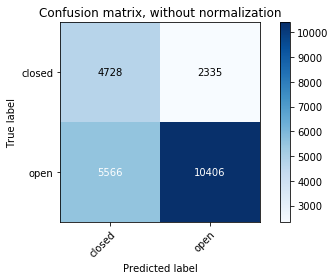

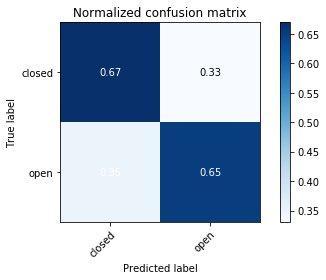

In [95]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_multi_nb, classes=['closed','open'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_multi_nb, classes=['closed','open'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [96]:
X_test[y_pred_class_multi_nb > y_test]

20290    home Unique reference number SC Inspection dat...
5929     Maples Centre Unique Reference Number EY Inspe...
15006    CRL V Our Reference EY Childcare Register outc...
5897     Suffolk Norfolk Graduate Teacher Programme Ini...
13912    Littlebrook Nursery Oaklands Park Wick Lane Eg...
625      ANNUAL ASSESSMENT VISIT MAIN FINDINGS Name Col...
2359     Chips Thorn Grove School Thorn Grove Primary S...
9281     Gumboots Community Nursery Crystal Palace Road...
9544     Microsoft Word Ltr Anne Newton Poole services ...
18662    Complete Fostering Solutions independent foste...
14805    Meadow View Nursery Meadow View Nursery Appleb...
13387    EYL V Piccadilly Gate Store Street Manchester ...
13995    Grendon Pre School Old Chapel Main Road Grendo...
17240    Fst Steps Playgroup Church Road Nuneaton CV EE...
6468     Little Lambs Childcare Branston Road Burton On...
1583     Flore Pre School High Street Flore Northampton...
3593     home Unique reference number SC Inspection dat.

In [97]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    print

    for coef, feat in (topn_class2):
        print (class_labels[1], coef, feat)

In [98]:
most_informative_feature_for_binary_classification(count_vect, multi_nb)

closed -12.981957640856765 nms boarders
closed -12.376212081193842 boarding house
closed -12.29526904033623 boarding houses
closed -11.880488207387874 grade sixth
closed -11.871494063916646 results gcse
closed -11.867731124387104 gcse course
closed -11.858850486448064 gcse examination
closed -11.729399066843456 years students
closed -11.692082801385897 gaining grades
closed -11.665652969157073 level results
open -5.610204751302751 people
open -5.581030362861043 make
open -5.572144678132673 school
open -5.5710118198900975 young
open -5.554120142075961 needs
open -5.489282622580653 skills
open -5.481217816261058 year
open -5.478557604962873 quality
open -5.474853485980411 support
open -5.430533242975557 standards


In [42]:
pickle.dump(multi_nb, open('multi_nb.pkl','wb'))

In [45]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_train)
km = KMeans(n_clusters=2, max_iter=1000)
km.fit(X)
clusters = km.labels_.tolist()

In [46]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 pupils
 teachers
 students
 year
 lessons
 average
 school
 make
 skills
 standards
Cluster 1:
 childcare
 nursery
 care
 parents
 staff
 quality
 registered
 setting
 act
 standards


Prediction


In [47]:
Y = vectorizer.transform(X_test)
prediction = km.predict(Y)
print(prediction)

[1 1 1 ... 1 1 0]


In [ ]:
import seaborn as sns; sns.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1], c=prediction, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


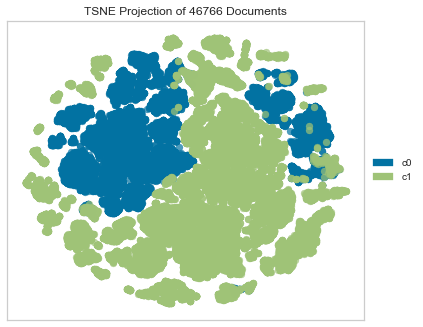

In [62]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(X, ["c{}".format(c) for c in clusters])
tsne.poof()

In [65]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=5, 
    random_state=0)
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [66]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [67]:
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names(), no_top_words)

Topic 0:
parents quality pupils standards skills school care nursery needs support
Topic 1:
slb astha clw tek pwc archon clr damar punnetts indigoskills
Topic 2:
fshc fortan gdn lawtrain headjogs kdts laccat tads jewson rwp
Topic 3:
frp alpington eastlands bergh kiara lfe wyevale emap tlz skandia
Topic 4:
academy predecessor converter converters conversion schoolurn faqs secretary new closed


In [4]:
import numpy as np
clf = '../models/multi_nb.pkl'
with open(clf,'rb') as f:
    model = pickle.load(f)

In [7]:
report = open('../example-reports/test.txt','r') 
content = report.read()

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSchool report \n \n\n \n\nBackwell Church of \nEngland Junior School \n\nChurch Lane, Backwell, Bristol, BS48 3JJ \n\n \n\nInspection dates 19–20 March 2014 \n \n\nOverall effectiveness \nPrevious inspection: Good 2 \n\nThis inspection: Outstanding 1 \n\nAchievement of pupils  Outstanding 1 \n\nQuality of teaching Outstanding 1 \n\nBehaviour and safety of pupils Outstanding 1 \n\nLeadership and management  Outstanding 1 \n \n\nSummary of key findings for parents and pupils \n\n \n\nThis is an outstanding school.  \n\n\uf06e Excellent leadership and strong teamwork \nfrom all staff ensure that much teaching is \noutstanding and never less than good. \n\n\uf06e Since the previous inspection, the \nheadteacher has successfully focused on \ntaking teaching to the highest level. \n\n\uf06e Achievement is outstanding throughout the \nschool. Pupils of all levels of ability make \nexcellent progress in reading, wri

In [23]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv_test = CountVectorizer(max_features=10000,ngram_range=(1,2))
# cv_test.transform([content])

In [27]:
np.array(content).reshape(-1,1)
# model.predict(np.array(content).reshape(-1,1))
# model.predict(content)

array([["\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSchool report \n \n\n \n\nBackwell Church of \nEngland Junior School \n\nChurch Lane, Backwell, Bristol, BS48 3JJ \n\n \n\nInspection dates 19–20 March 2014 \n \n\nOverall effectiveness \nPrevious inspection: Good 2 \n\nThis inspection: Outstanding 1 \n\nAchievement of pupils  Outstanding 1 \n\nQuality of teaching Outstanding 1 \n\nBehaviour and safety of pupils Outstanding 1 \n\nLeadership and management  Outstanding 1 \n \n\nSummary of key findings for parents and pupils \n\n \n\nThis is an outstanding school.  \n\n\uf06e Excellent leadership and strong teamwork \nfrom all staff ensure that much teaching is \noutstanding and never less than good. \n\n\uf06e Since the previous inspection, the \nheadteacher has successfully focused on \ntaking teaching to the highest level. \n\n\uf06e Achievement is outstanding throughout the \nschool. Pupils of all levels of ability make \nexcellent progress in read